# &#x1F4D1; &nbsp;  Build  a  Digit Recognition Models

## Links
[SciPy. Multi-dimensional image processing](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

[Keras. Deep Learning library for Theano and TensorFlow](https://keras.io/)
 
[TensorFlow. Deep MNIST for Experts](https://www.tensorflow.org/get_started/mnist/pros)

[Tensorflow Deep MNIST Advanced Tutorial](http://docs.seldon.io/tensorflow-deep-mnist-example.html)

[Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

## Libraries

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron');
body {background-color: gainsboro;} 
a {color: #818286; font-family: Orbitron;} 
h1, h2 {color: #37c9e1; font-family: Orbitron; text-shadow: 4px 4px 4px #aaa;} 
h3, h4 {color: #818286; font-family: Orbitron; text-shadow: 4px 4px 4px #aaa;}
</style>

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from time import time

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML, display

import matplotlib.pylab as plt
import matplotlib.cm as cm

%matplotlib inline

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model, neighbors, svm, ensemble
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split

In [4]:
import keras as ks
from keras.models import Sequential, load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.layers.advanced_activations import PReLU
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## Dataset

In [5]:
df_train = pd.read_csv("kaggle_digits_train.csv")
df_test = pd.read_csv("kaggle_digits_test.csv")
df_train.shape

(42000, 785)

In [6]:
df_train.ix[15:20,15:20]

,pixel14,pixel15,pixel16,pixel17,pixel18
15,0,0,0,0,0
16,0,0,0,0,0
17,0,0,0,0,0
18,0,0,0,0,0
19,0,0,0,0,0
20,0,0,0,0,0


In [7]:
images = ["%s%s" %("pixel",pixel_no) for pixel_no in range(0,784)]
train_images = np.array(df_train[images])
train_images = train_images.astype('float32')/255
train_images.shape

(42000, 784)

In [8]:
train_labels = df_train['label']
train_labels_cat = ks.utils.to_categorical(train_labels, num_classes=10)
train_labels_cat.shape

(42000, 10)

In [9]:
test_images = np.array(df_test[images])
test_images = test_images.astype('float32')/255
test_images.shape

(28000, 784)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels_cat, 
                                                    test_size=0.2, random_state=32)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600, 10), (8400, 10))

In [12]:
y_train_num = np.array([np.argmax(x) for x in y_train])
y_test_num = np.array([np.argmax(x) for x in y_test])

## Examples

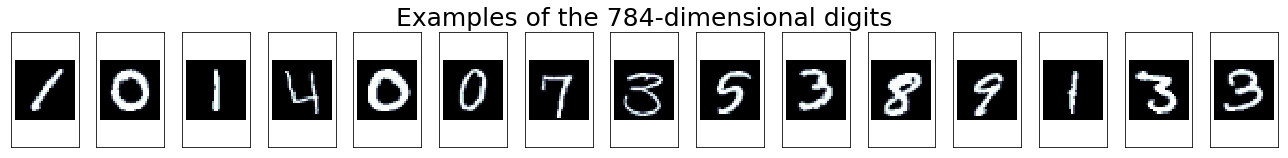

In [13]:
fig, ax = plt.subplots(figsize=(18, 2), nrows=1, ncols=15, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    image = train_images[i].reshape(28,28)
    ax[i].imshow(image, cmap=cm.bone)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.gcf()
ax[7].set_title('Examples of the 784-dimensional digits', fontsize=25);

## Neural Network Models

### Model #1. Convolutional Neural Network. Keras

In [121]:
def cnn_mc_model():
    model_input = Input(shape=(28, 28, 1))
    x = BatchNormalization()(model_input)
    
    x = Conv2D(42, (5, 5), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(84, (5, 5), activation='relu')(x)
    x = MaxPooling2D(strides=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    
    x = Dense(256, activation='relu')(x)    
    x = Dropout(0.5)(x)
    
    y = Dense(10, activation='softmax')(x)
    
    model = Model(input=model_input, output=y)
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

cnn_mc_model = cnn_mc_model()

In [122]:
cnn_checkpointer = ModelCheckpoint(filepath='weights.best2.cnn_mc.digits.hdf5', 
                                   verbose=2, save_best_only=True)

fit_cnn = cnn_mc_model.fit(X_train.reshape(33600, 28, 28, 1), y_train, 
                           validation_data=(X_test.reshape(8400, 28, 28, 1), y_test), 
                           epochs=30, batch_size=128, verbose=2, callbacks=[cnn_checkpointer])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 0.05655, saving model to weights.best2.cnn_mc.digits.hdf5
145s - loss: 0.2657 - acc: 0.9158 - val_loss: 0.0565 - val_acc: 0.9849
Epoch 2/30
Epoch 00001: val_loss improved from 0.05655 to 0.04100, saving model to weights.best2.cnn_mc.digits.hdf5
123s - loss: 0.0778 - acc: 0.9768 - val_loss: 0.0410 - val_acc: 0.9882
Epoch 3/30
Epoch 00002: val_loss improved from 0.04100 to 0.03757, saving model to weights.best2.cnn_mc.digits.hdf5
119s - loss: 0.0588 - acc: 0.9819 - val_loss: 0.0376 - val_acc: 0.9896
Epoch 4/30
Epoch 00003: val_loss did not improve
112s - loss: 0.0487 - acc: 0.9846 - val_loss: 0.0418 - val_acc: 0.9890
Epoch 5/30
Epoch 00004: val_loss improved from 0.03757 to 0.03497, saving model to weights.best2.cnn_mc.digits.hdf5
118s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0350 - val_acc: 0.9894
Epoch 6/30
Epoch 00005: val_loss improved from 0.03497 to 0.03460, saving model to weig

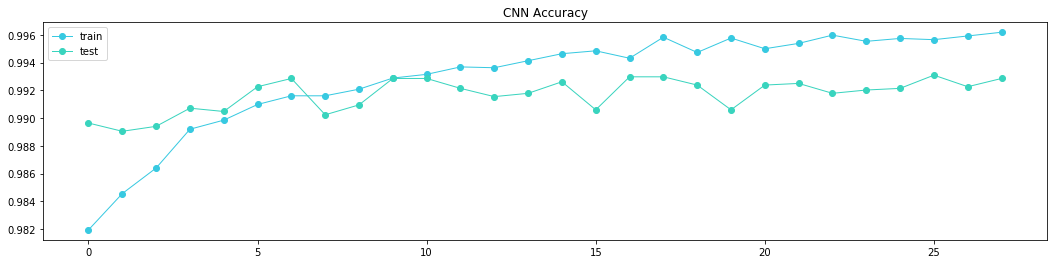

In [123]:
plt.figure(figsize=(18, 4))
plt.plot(fit_cnn.history['acc'][2:], '-o', c='#37c9e1', lw=1, label = 'train')
plt.plot(fit_cnn.history['val_acc'][2:], '-o', c='#39d4be', lw=1, label = 'test')
plt.legend()
plt.title('CNN Accuracy');

In [124]:
cnn_mc_model.load_weights('weights.best2.cnn_mc.digits.hdf5')
cnn_scores = cnn_mc_model.evaluate(X_test.reshape(8400, 28, 28, 1), y_test, verbose=0)

print("CNN Scores: " , (cnn_scores))
print("CNN Error: %.2f%%" % (100 - cnn_scores[1]*100))
print(cnn_mc_model.summary())

CNN Scores:  [0.027569020900478313, 0.99250000000000005]
CNN Error: 0.75%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 42)        1092      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 42)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 14, 14, 42)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 84)        88284     
_________________________________________________________________
ma

In [125]:
steps, epochs = 1000, 15
data_generator = ImageDataGenerator(zoom_range=0.2, rotation_range=20)

fit_dg_cnn = cnn_mc_model.fit_generator(data_generator.flow(X_train.reshape(33600, 28, 28, 1), 
                                                            y_train, 
                                                            batch_size=128),
                                        steps_per_epoch = steps, epochs = epochs,
                                        validation_data = (X_test.reshape(8400, 28, 28, 1), y_test), 
                                        callbacks=[cnn_checkpointer], verbose=2)

Epoch 1/15
Epoch 00000: val_loss improved from 0.02757 to 0.02541, saving model to weights.best2.cnn_mc.digits.hdf5
403s - loss: 0.0700 - acc: 0.9784 - val_loss: 0.0254 - val_acc: 0.9938
Epoch 2/15
Epoch 00001: val_loss did not improve
399s - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0256 - val_acc: 0.9935
Epoch 3/15
Epoch 00002: val_loss did not improve
401s - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0275 - val_acc: 0.9931
Epoch 4/15
Epoch 00003: val_loss improved from 0.02541 to 0.02058, saving model to weights.best2.cnn_mc.digits.hdf5
399s - loss: 0.0425 - acc: 0.9871 - val_loss: 0.0206 - val_acc: 0.9943
Epoch 5/15
Epoch 00004: val_loss did not improve
399s - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0221 - val_acc: 0.9940
Epoch 6/15
Epoch 00005: val_loss did not improve
400s - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0206 - val_acc: 0.9951
Epoch 7/15
Epoch 00006: val_loss did not improve
398s - loss: 0.0386 - acc: 0.9882 - val_loss: 0.0220 - val_acc: 0.9948
Epoch 8/15
Epoch 00007: va

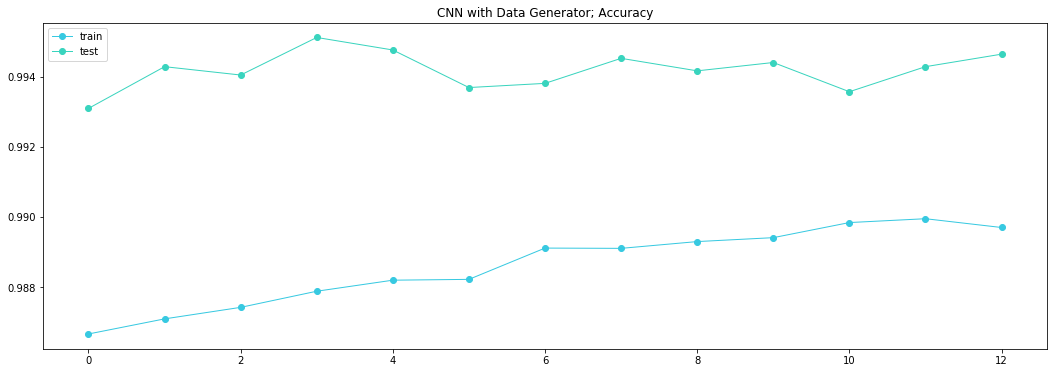

In [126]:
plt.figure(figsize=(18, 6))
plt.plot(fit_dg_cnn.history['acc'][2:], '-o', c='#37c9e1', lw=1, label = 'train')
plt.plot(fit_dg_cnn.history['val_acc'][2:], '-o', c='#39d4be', lw=1, label = 'test')
plt.legend()
plt.title('CNN with Data Generator; Accuracy');

In [127]:
fit_again_cnn = cnn_mc_model.fit(X_train.reshape(33600, 28, 28, 1), y_train, 
                                 validation_data=(X_test.reshape(8400, 28, 28, 1), y_test), 
                                 epochs=10, batch_size=128, verbose=2, callbacks=[cnn_checkpointer])

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
Epoch 00000: val_loss improved from 0.02058 to 0.02054, saving model to weights.best2.cnn_mc.digits.hdf5
109s - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0205 - val_acc: 0.9950
Epoch 2/10
Epoch 00001: val_loss did not improve
108s - loss: 0.0071 - acc: 0.9975 - val_loss: 0.0263 - val_acc: 0.9949
Epoch 3/10
Epoch 00002: val_loss did not improve
108s - loss: 0.0093 - acc: 0.9967 - val_loss: 0.0237 - val_acc: 0.9948
Epoch 4/10
Epoch 00003: val_loss did not improve
109s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.0236 - val_acc: 0.9943
Epoch 5/10
Epoch 00004: val_loss did not improve
108s - loss: 0.0081 - acc: 0.9972 - val_loss: 0.0282 - val_acc: 0.9943
Epoch 6/10
Epoch 00005: val_loss did not improve
108s - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0263 - val_acc: 0.9949
Epoch 7/10
Epoch 00006: val_loss did not improve
109s - loss: 0.0084 - acc: 0.9978 - val_loss: 0.0294 - val_acc: 0.9939
Epoch 8/10
Epoch 00007: val_loss did not imp

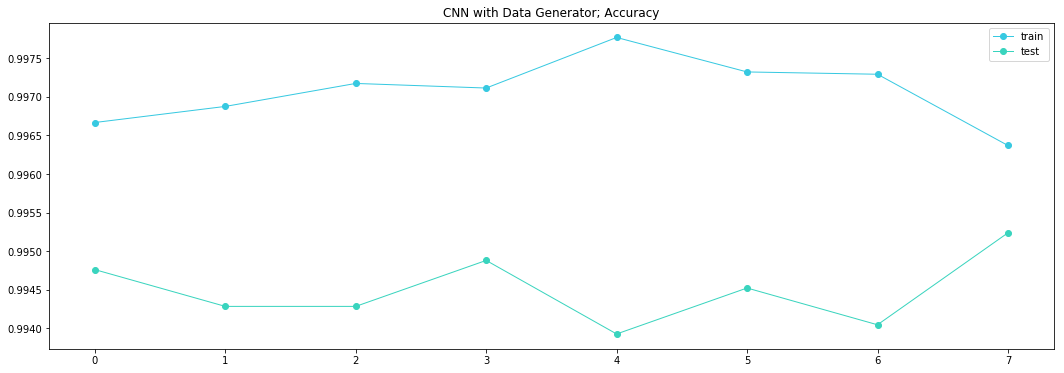

In [128]:
plt.figure(figsize=(18, 6))
plt.plot(fit_again_cnn.history['acc'][2:], '-o', c='#37c9e1', lw=1, label = 'train')
plt.plot(fit_again_cnn.history['val_acc'][2:], '-o', c='#39d4be', lw=1, label = 'test')
plt.legend()
plt.title('CNN with Data Generator; Accuracy');

In [129]:
cnn_mc_model.load_weights('weights.best2.cnn_mc.digits.hdf5')
cnn_scores = cnn_mc_model.evaluate(X_test.reshape(8400, 28, 28, 1), y_test, verbose=0)

print("CNN with Data Generator; Scores: " , (cnn_scores))
print("CNN with Data Generator; Error: %.2f%%" % (100 - cnn_scores[1]*100))

CNN with Data Generator; Scores:  [0.020537976320464665, 0.995]
CNN with Data Generator; Error: 0.50%


In [130]:
cnn_mc_model.save('kaggle_digits_cnn_mc_model2.h5')

### Model #2. Multi-layer Perceptron. Keras

In [ ]:
"""
def mlp_mc_model():
    model_input = Input(shape=(784,))
    x = BatchNormalization()(model_input)   

    x = Dense(784, activation='relu')(x)    
    x = Dropout(0.5)(x)

    x = Dense(784, activation='relu')(x)
    x = Dropout(0.5)(x)

    y = Dense(10, activation='softmax')(x)
    
    model = Model(input=model_input, output=y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
"""
""""""

In [90]:
def mlp_mc_model():
    model = Sequential()
    
    model.add(Dense(1568, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    
    model.add(Dense(392, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp_mc_model = mlp_mc_model()

In [91]:
mlp_checkpointer = ModelCheckpoint(filepath='weights.best.mlp_mc.digits.hdf5', 
                                   verbose=2, save_best_only=True)
fit_mlp = mlp_mc_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                           epochs=15, batch_size=128, verbose=2, callbacks=[mlp_checkpointer]);

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
Epoch 00000: val_loss improved from inf to 0.15568, saving model to weights.best.mlp_mc.digits.hdf5
24s - loss: 0.3195 - acc: 0.9008 - val_loss: 0.1557 - val_acc: 0.9507
Epoch 2/15
Epoch 00001: val_loss improved from 0.15568 to 0.10542, saving model to weights.best.mlp_mc.digits.hdf5
20s - loss: 0.1274 - acc: 0.9606 - val_loss: 0.1054 - val_acc: 0.9681
Epoch 3/15
Epoch 00002: val_loss improved from 0.10542 to 0.10227, saving model to weights.best.mlp_mc.digits.hdf5
20s - loss: 0.0924 - acc: 0.9730 - val_loss: 0.1023 - val_acc: 0.9705
Epoch 4/15
Epoch 00003: val_loss did not improve
19s - loss: 0.0740 - acc: 0.9772 - val_loss: 0.1023 - val_acc: 0.9717
Epoch 5/15
Epoch 00004: val_loss did not improve
19s - loss: 0.0626 - acc: 0.9813 - val_loss: 0.1158 - val_acc: 0.9710
Epoch 6/15
Epoch 00005: val_loss did not improve
19s - loss: 0.0575 - acc: 0.9826 - val_loss: 0.1029 - val_acc: 0.9744
Epoch 7/15
Epoch 00006: val_loss improved f

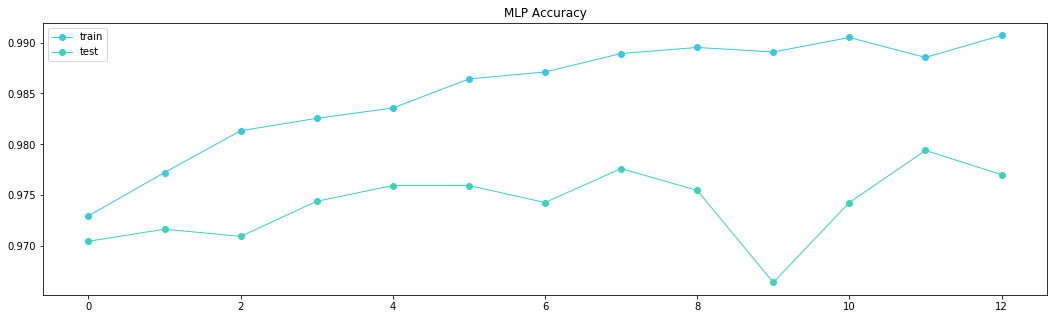

In [95]:
plt.figure(figsize=(18,5))
plt.plot(fit_mlp.history['acc'][2:], '-o', c='#37c9e1', lw=1, label = 'train')
plt.plot(fit_mlp.history['val_acc'][2:], '-o', c='#39d4be', lw=1, label = 'test')
plt.legend()
plt.title('MLP Accuracy');

In [96]:
mlp_mc_model.load_weights('weights.best.mlp_mc.digits.hdf5')
mlp_scores = mlp_mc_model.evaluate(X_test, y_test)

print("\nMLP Scores: ", (mlp_scores))
print("MLP Error: %.2f%%" % (100 - mlp_scores[1] * 100))
print(mlp_mc_model.summary())

8400/8400 [==============================] - 2s     

In [97]:
mlp_mc_model.save('kaggle_digits_mlp_mc_model.h5')

### Model #3. Recurrent Neural Network. Keras

In [70]:
def rnn_mc_model():
    model = Sequential()

    model.add(LSTM(196, return_sequences=True, input_shape=(1, 784)))    
    model.add(LSTM(196, return_sequences=True))
    
    model.add(LSTM(784))  
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])    
    return model 

In [71]:
rnn_mc_model = rnn_mc_model()
rnn_checkpointer = ModelCheckpoint(filepath='weights.best.rnn_mc.digits.hdf5', 
                                   verbose=2, save_best_only=True)
fit_rnn = rnn_mc_model.fit(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), y_train, 
                           epochs=10, batch_size=128, verbose=2, callbacks=[rnn_checkpointer],
                           validation_data=(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]), y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.17883, saving model to weights.best.rnn_mc.digits.hdf5
93s - loss: 0.3666 - acc: 0.8876 - val_loss: 0.1788 - val_acc: 0.9444
Epoch 2/10
Epoch 00001: val_loss improved from 0.17883 to 0.12626, saving model to weights.best.rnn_mc.digits.hdf5
83s - loss: 0.1207 - acc: 0.9620 - val_loss: 0.1263 - val_acc: 0.9618
Epoch 3/10
Epoch 00002: val_loss improved from 0.12626 to 0.12022, saving model to weights.best.rnn_mc.digits.hdf5
82s - loss: 0.0774 - acc: 0.9752 - val_loss: 0.1202 - val_acc: 0.9629
Epoch 4/10
Epoch 00003: val_loss improved from 0.12022 to 0.10942, saving model to weights.best.rnn_mc.digits.hdf5
82s - loss: 0.0538 - acc: 0.9825 - val_loss: 0.1094 - val_acc: 0.9664
Epoch 5/10
Epoch 00004: val_loss improved from 0.10942 to 0.08593, saving model to weights.best.rnn_mc.digits.hdf5
84s - loss: 0.0419 - acc: 0.9867 - val_loss: 0.0859 - val_acc: 0.9757
Epoch 6/10
Epoch 00005: val_lo

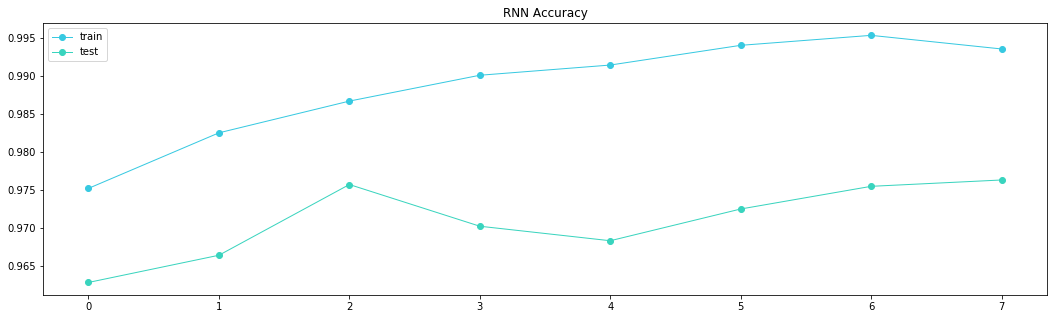

In [173]:
plt.figure(figsize=(18,5))
plt.plot(fit_rnn.history['acc'][2:], '-o', c='#37c9e1', lw=1, label = 'train')
plt.plot(fit_rnn.history['val_acc'][2:], '-o', c='#39d4be', lw=1, label = 'test')
plt.legend()
plt.title('RNN Accuracy');

In [73]:
rnn_mc_model.load_weights('weights.best.rnn_mc.digits.hdf5')
rnn_scores = rnn_mc_model.evaluate(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]), y_test)

print("\nRNN Scores: ", (rnn_scores))
print("RNN Error: %.2f%%" % (100 - rnn_scores[1] * 100))
print(rnn_mc_model.summary())

8384/8400 [============================>.] - ETA: 0s

In [74]:
rnn_mc_model.save('kaggle_digits_rnn_mc_model.h5')

### Model #4. MLPClassifier. Scikit-Learn

In [91]:
clf = MLPClassifier(hidden_layer_sizes=(784,), max_iter=50, alpha=1e-4,
                     solver='adam', verbose=1, tol=1e-6, random_state=1,
                     learning_rate_init=7e-4, batch_size=128)
clf.fit(X_train, y_train);

Iteration 1, loss = 0.94378841
Iteration 2, loss = 0.40011765
Iteration 3, loss = 0.28336239
Iteration 4, loss = 0.21722986
Iteration 5, loss = 0.17410363
Iteration 6, loss = 0.14131103
Iteration 7, loss = 0.11730296
Iteration 8, loss = 0.09752419
Iteration 9, loss = 0.08076081
Iteration 10, loss = 0.06640700
Iteration 11, loss = 0.05535066
Iteration 12, loss = 0.04585736
Iteration 13, loss = 0.03845437
Iteration 14, loss = 0.03147112
Iteration 15, loss = 0.02565168
Iteration 16, loss = 0.02093476
Iteration 17, loss = 0.01767376
Iteration 18, loss = 0.01517816
Iteration 19, loss = 0.01263184
Iteration 20, loss = 0.01070031
Iteration 21, loss = 0.00873292
Iteration 22, loss = 0.00763798
Iteration 23, loss = 0.00644964
Iteration 24, loss = 0.00566928
Iteration 25, loss = 0.00514124
Iteration 26, loss = 0.00476469
Iteration 27, loss = 0.00401193
Iteration 28, loss = 0.00387241
Iteration 29, loss = 0.02353646
Iteration 30, loss = 0.00877345
Iteration 31, loss = 0.00362994
Iteration 32, los

In [92]:
print("MNIST. MLPClassifier. Train score: %f" % (clf.score(X_train, y_train)*100),'%')
print("MNIST. MLPClassifier. Test score: %f" % (clf.score(X_test, y_test)*100),'%')

MNIST. MLPClassifier. Train score: 100.000000 %
MNIST. MLPClassifier. Test score: 96.380952 %


In [93]:
clf2 = MLPClassifier(hidden_layer_sizes=(784,), max_iter=50, alpha=1e-4,
                     solver='lbfgs', verbose=1, tol=1e-6, random_state=1,
                     learning_rate_init=7e-4, batch_size=128)
clf2.fit(X_train, y_train_num);

In [94]:
print("MNIST. MLPClassifier. Train score: %f" % (clf2.score(X_train, y_train_num)*100),'%')
print("MNIST. MLPClassifier. Test score: %f" % (clf2.score(X_test, y_test_num)*100),'%')

MNIST. MLPClassifier. Train score: 98.092262 %
MNIST. MLPClassifier. Test score: 96.916667 %


## Classifiers

In [175]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

In [176]:
def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(metrics.accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(metrics.accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(metrics.hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(metrics.hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

In [177]:
def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 
                               'acc_test': acc_test,
                               'loss_train': loss_train, 
                               'loss_test': loss_test})
    
    df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']
               
    return df_results, df_results[df_list]

In [178]:
clf1 = neighbors.KNeighborsClassifier()
clf2 = linear_model.LogisticRegressionCV() 
clf3 = ensemble.GradientBoostingClassifier()

In [179]:
y_knc_train, y_knc_test = classifier_fit_score(clf1, 'KNeighborsClassifier', 'digits',
                                               X_train, X_test, y_train_num, y_test_num)[:2]

In [180]:
y_lrcvc_train, y_lrcvc_test = classifier_fit_score(clf2, 'LogisticRegressionCV', 'digits',
                                                   X_train, X_test, y_train_num, y_test_num)[:2]

In [181]:
y_gbc_train, y_gbc_test = classifier_fit_score(clf3, 'GradientBoostingClassifier', 'digits',
                                               X_train, X_test, y_train_num, y_test_num)[:2]

In [182]:
df_results, df_results2  = get_classifier_results()
df_results2.sort_values('acc_test', ascending=False)

,classifier_name,acc_train,acc_test,loss_train,loss_test
0,KNeighborsClassifier,0.9778,0.9657,0.0222,0.0343
2,GradientBoostingClassifier,0.9676,0.9440,0.0324,0.0560
1,LogisticRegressionCV,0.9282,0.9177,0.0718,0.0823


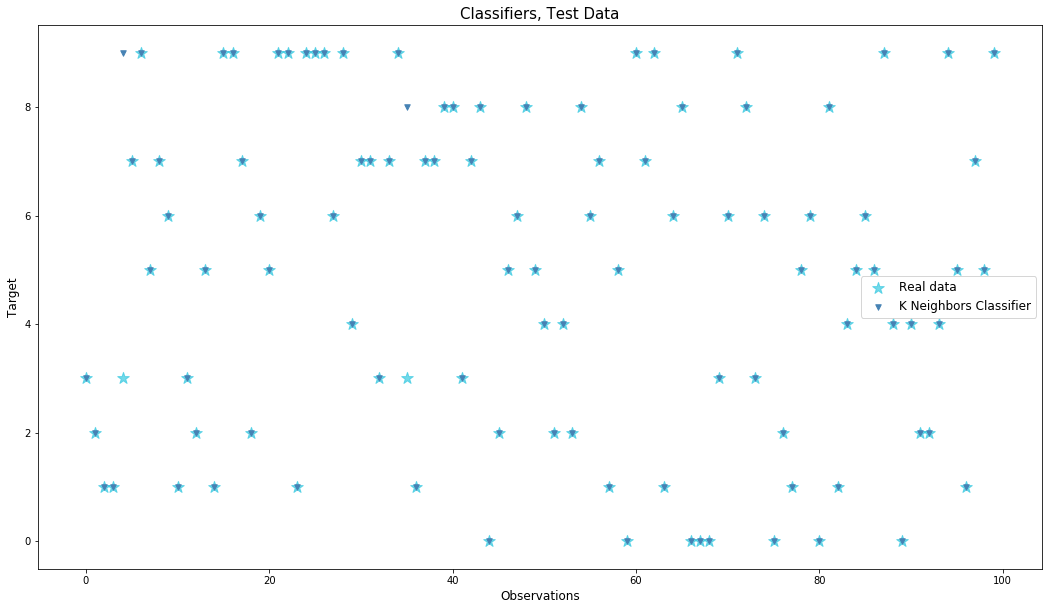

In [208]:
plt.figure(figsize=(18, 10))
n=100
x=range(n)

plt.scatter(x, y_test_num[:n], marker='*', s=150, color='#37c9e1', alpha=0.7, label='Real data')

plt.scatter(x, y_knc_test[:n], marker='v', s=30, color='steelblue', label='K Neighbors Classifier')
# plt.scatter(x, y_lrcvc_test[:n], marker='s', s=30, color='darkblue', label='Logistic RegressionCV')
# plt.scatter(x, y_gbc_test[:n], marker='o', s=30, color='darkgreen', label='GradientBoostingClassifier')

plt.xlabel('Observations', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title('Classifiers, Test Data', fontsize=15)
plt.legend(loc=5, fontsize=12);

## Predictions

In [131]:
predict_labels_cnn = cnn_mc_model.predict(test_images.reshape(28000,28,28,1))
predict_labels_cnn = predict_labels_cnn.argmax(axis=-1)
predict_labels_cnn[:100]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [132]:
predict_labels_mlp = mlp_mc_model.predict_classes(test_images)
predict_labels_mlp[:100]

27840/28000 [============================>.] - ETA: 0s   

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [114]:
predict_labels_rnn = rnn_mc_model.predict_classes(test_images.reshape(28000,1,784))
predict_labels_rnn[:100]

28000/28000 [==============================] - 32s       

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [120]:
predict_labels_mlpc = clf.predict(test_images)
predict_labels_mlpc_num = np.array([np.argmax(x) for x in predict_labels_mlpc])
predict_labels_mlpc_num[:100]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 0, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4])

In [87]:
submission_cnn = pd.DataFrame({"ImageId": range(1, len(predict_labels_cnn)+1), 
                               "Label": predict_labels_cnn})
print(submission_cnn[0:20])
submission_cnn.to_csv('kaggle_digits_cnn_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      0
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [44]:
submission_mlp = pd.DataFrame({"ImageId": range(1, len(predict_labels_mlp)+1), 
                               "Label": predict_labels_mlp})
print(submission_mlp[:20])
submission_mlp.to_csv('kaggle_digits_mlp_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [118]:
submission_rnn = pd.DataFrame({"ImageId": range(1, len(predict_labels_rnn)+1), 
                               "Label": predict_labels_rnn})
print(submission_rnn[0:20])
submission_rnn.to_csv('kaggle_digits_rnn_mc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [122]:
submission_mlpc = pd.DataFrame({"ImageId": range(1, len(predict_labels_mlpc_num)+1), 
                                "Label": predict_labels_mlpc_num})
print(submission_mlpc[0:20])
submission_mlpc.to_csv('kaggle_digits_mlpc_model.csv', index=False)

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      9
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [39]:
real_data = np.array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3,
                      5, 7, 4, 0, 4, 3, 3, 1, 9, 0,
                      9, 1, 1, 5, 7, 4, 2, 7, 4, 7,
                      7, 5, 4, 2, 6, 2, 5, 5, 1, 6,
                      7, 7, 4, 9, 8, 7, 8, 2, 6, 7,
                      6, 8, 8, 3, 8, 2, 1, 2, 2, 0,
                      4, 1, 7, 0, 0, 0, 1, 9, 0, 1,
                      6, 5, 8, 8, 2, 8, 9, 9, 2, 3,
                      5, 4, 1, 0, 9, 2, 4, 3, 6, 7,
                      2, 0, 6, 6, 1, 4, 3, 9, 7, 4,
                      0, 9, 2, 0, 7, 3, 0, 5, 0, 8,
                      0, 0, 4, 7, 1, 7, 1, 1, 3, 3,
                      3, 7, 2, 8, 6, 3, 8, 7, 7, 4,
                      3, 5, 4, 0, 0, 0, 3, 1, 3, 6,
                      4, 3, 4, 5, 5, 8, 7, 4, 2, 8,
                      4, 3, 5, 6, 5, 3, 7, 5, 7, 8,
                      3, 0, 4, 5, 1, 3, 7, 6, 3, 0,
                      2, 7, 8, 6, 1, 3, 7, 4, 1, 2,
                      4, 8, 5, 2, 4, 9, 2, 1, 6, 0,
                      6, 1, 4, 9, 6, 0, 9, 7, 6, 9])

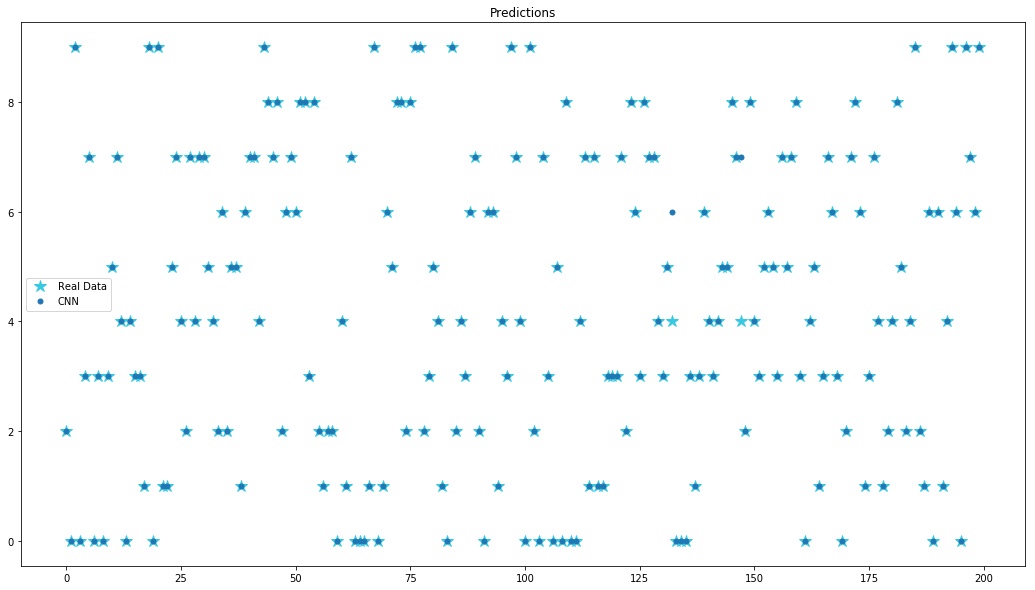

In [133]:
plt.figure(figsize = (18, 10))

plt.plot(real_data[0:200], '*', ms=12, c='#37c9e1', label='Real Data')

plt.plot(submission_cnn['Label'][0:200], 'o', ms=5, label='CNN')
# plt.plot(submission_mlp['Label'][0:200], 'v', ms=5, label='MLP')
# plt.plot(submission_rnn['Label'][0:200], 's', ms=5, label='RNN')
# plt.plot(submission_mlpc['Label'][0:200], 'p', ms=5, label='MLPC')

plt.legend(loc=6)
plt.title("Predictions");

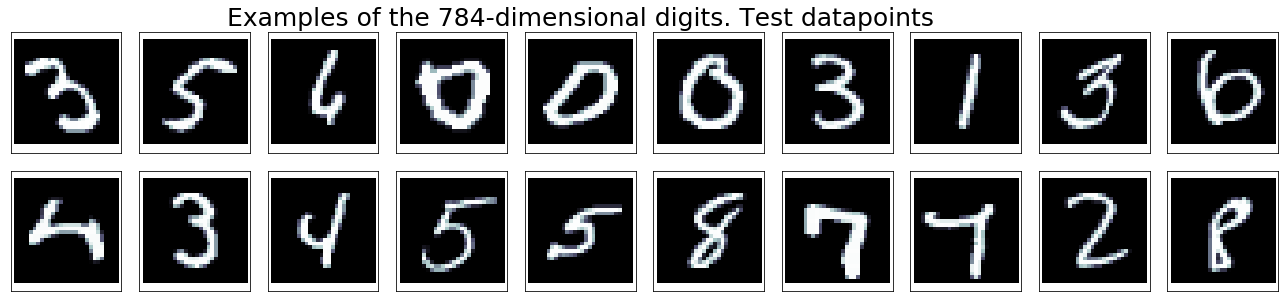

In [89]:
fig, ax = plt.subplots(figsize=(18, 4), nrows=2, ncols=10, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    image = test_images[130:150][i].reshape(28,28)
    ax[i].imshow(image, cmap=cm.bone)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.gcf()
ax[4].set_title('Examples of the 784-dimensional digits. Test datapoints', fontsize=25);